# PREDICTION DE LA PERFORMANCE DES EMPLOYES 

AUTEURS : MERAOUI Camélia, PERVENCHE Clémence, ROCHER Ludovic

<div style="text-align:center;">
    <img src="image.jpg" alt="Nom_de_l_image" style="width:50%;" />
</div>

## Import 

In [408]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier


## Fonctions utiles

### Exécution des classifiers avec cross-validate

In [409]:
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_validate

def custom_scoring_function(y_true, y_pred):
    error_margin = 0.1
    
    absolute_errors = abs(y_true - y_pred)
    
    within_margin = (absolute_errors <= error_margin).mean()
    
    return within_margin



def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i, clf in clfs.items():
        scoring_metrics = {'mae': make_scorer(mean_absolute_error),
                           'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
                           'r2_score': make_scorer(r2_score), 
                           'custom_score': make_scorer(custom_scoring_function)}
        cv_results = cross_validate(clf, X, Y, cv=kf, scoring=scoring_metrics)
        
        print("Temps d'exécution de l'algorithme pour l'apprentissage de {0} : {1:.2f} secondes".format(i, np.mean(cv_results["fit_time"])))
        print("Temps d'exécution de l'algorithme pour la prédiction de {0} : {1:.2f} secondes".format(i, np.mean(cv_results["score_time"])))
        print("MAE for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_results['test_mae']), np.std(cv_results['test_mae'])))
        print("RMSE for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_results['test_rmse']), np.std(cv_results['test_rmse'])))
        print("R2 score for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_results['test_r2_score']), np.std(cv_results['test_r2_score'])))
        print("Custom score for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_results['test_custom_score']), np.std(cv_results['test_custom_score'])))

        print("\n")





### Extraire l'année des dates

In [410]:
def extract_year(date_string):
    if date_string != "?" and date_string is not np.nan:
        return int(str(date_string).split("-")[-1])
    return -1

## File paths

In [411]:
file_path = "productivity_employees_green/"

employees_data_perf_path = f"{file_path}employee_data_performances.csv"
employee_engagement_survey_data_path = f"{file_path}employee_engagement_survey_data.csv"
recruitment_data = f"{file_path}recruitment_data.csv"
training_and_development_data = f"{file_path}training_and_development_data.csv"

## Ouvrir le fichier et visualisation

### Ouvrir le fichier en format dataframe

In [412]:
df_emp_perf = pd.read_csv(employees_data_perf_path, sep=',')

### Récupérer les années à partir des dates

In [413]:
df_emp_perf['DOB'] = df_emp_perf['DOB'].apply(extract_year)
df_emp_perf['StartDate'] = df_emp_perf['StartDate'].apply(extract_year)

### Affichage du nombre de valeurs uniques pour chaque colonnes

In [414]:
for col in df_emp_perf:
    print(f'Column name: ', col , '\nuniques val: ', df_emp_perf[col].nunique(), '\n------------')

Column name:  EmpID 
uniques val:  3000 
------------
Column name:  FirstName 
uniques val:  1597 
------------
Column name:  LastName 
uniques val:  1137 
------------
Column name:  StartDate 
uniques val:  6 
------------
Column name:  ExitDate 
uniques val:  820 
------------
Column name:  Title 
uniques val:  32 
------------
Column name:  Supervisor 
uniques val:  2952 
------------
Column name:  ADEmail 
uniques val:  2998 
------------
Column name:  BusinessUnit 
uniques val:  10 
------------
Column name:  EmployeeStatus 
uniques val:  5 
------------
Column name:  EmployeeType 
uniques val:  3 
------------
Column name:  PayZone 
uniques val:  3 
------------
Column name:  EmployeeClassificationType 
uniques val:  3 
------------
Column name:  TerminationType 
uniques val:  5 
------------
Column name:  TerminationDescription 
uniques val:  1533 
------------
Column name:  DepartmentType 
uniques val:  6 
------------
Column name:  Division 
uniques val:  25 
------------
Colu

### Suppression des colonnes inutiles

In [415]:
columns_to_drop = ['EmpID', 'FirstName', 'LastName', 'ExitDate', 'Supervisor', 'ADEmail', 'LocationCode']
df_emp_perf = df_emp_perf.drop(columns_to_drop, axis=1)
df_emp_perf.head()

,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,DOB,State,JobFunctionDescription,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Unk,NaN,Production,Finance & Accounting,1969,MA,Accounting,Female,White,Widowed,Fully Meets,4
1,23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Unk,NaN,Production,Aerial,1965,MA,Labor,Male,Hispanic,Widowed,Fully Meets,3
2,18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Unk,NaN,Sales,General - Sga,1991,MA,Assistant,Male,Hispanic,Widowed,Fully Meets,4
3,21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Unk,NaN,Sales,Finance & Accounting,1998,ND,Clerk,Male,Other,Single,Fully Meets,2
4,19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Unk,NaN,Sales,General - Con,1969,FL,Laborer,Female,Other,Married,Fully Meets,3


In [416]:
for col in df_emp_perf:
    print(f'Column name: ', col , '\nuniques val: ', df_emp_perf[col].nunique(), '\n------------')

Column name:  StartDate 
uniques val:  6 
------------
Column name:  Title 
uniques val:  32 
------------
Column name:  BusinessUnit 
uniques val:  10 
------------
Column name:  EmployeeStatus 
uniques val:  5 
------------
Column name:  EmployeeType 
uniques val:  3 
------------
Column name:  PayZone 
uniques val:  3 
------------
Column name:  EmployeeClassificationType 
uniques val:  3 
------------
Column name:  TerminationType 
uniques val:  5 
------------
Column name:  TerminationDescription 
uniques val:  1533 
------------
Column name:  DepartmentType 
uniques val:  6 
------------
Column name:  Division 
uniques val:  25 
------------
Column name:  DOB 
uniques val:  61 
------------
Column name:  State 
uniques val:  28 
------------
Column name:  JobFunctionDescription 
uniques val:  83 
------------
Column name:  GenderCode 
uniques val:  2 
------------
Column name:  RaceDesc 
uniques val:  5 
------------
Column name:  MaritalDesc 
uniques val:  4 
------------
Column

In [417]:
from sklearn.impute import SimpleImputer

mode_value = df_emp_perf['TerminationDescription'].mode()[0]
df_emp_perf['TerminationDescription'].fillna(mode_value, inplace=True)

### Numérisation des colonnes

#### Utilisation de OneHotEncoder

In [418]:
from sklearn.preprocessing import OneHotEncoder

cols = ['EmployeeStatus', 'EmployeeType', 'DepartmentType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'Performance Score']

encoder = OneHotEncoder()

X = df_emp_perf.iloc[:, :-1]

non_encoded_cols = []

for column in cols:
    if X[column].dtype == 'object':
        encoder.fit(df_emp_perf[[column]])
        encoded_data = encoder.transform(df_emp_perf[[column]]).toarray()
        X_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
        X = pd.concat([X.drop(column, axis=1), X_encoded], axis=1)
    else:
        non_encoded_cols.append(column)

# Ajouter les colonnes non encodées à la fin du DataFrame X
X = pd.concat([X, df_emp_perf[non_encoded_cols]], axis=1)




In [419]:
X.head()

,StartDate,Title,BusinessUnit,TerminationDescription,Division,DOB,State,JobFunctionDescription,EmployeeStatus_Active,EmployeeStatus_Future Start,...,RaceDesc_Other,RaceDesc_White,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Single,MaritalDesc_Widowed,Performance Score_Exceeds,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP
0,19,Production Technician I,CCDR,A discussion quite mission.,Finance & Accounting,1969,MA,Accounting,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,Production Technician I,EW,A discussion quite mission.,Aerial,1965,MA,Labor,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,18,Area Sales Manager,PL,A discussion quite mission.,General - Sga,1991,MA,Assistant,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,21,Area Sales Manager,CCDR,A discussion quite mission.,Finance & Accounting,1998,ND,Clerk,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,19,Area Sales Manager,TNS,A discussion quite mission.,General - Con,1969,FL,Laborer,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Pour chaque colonne, on va récupérer la moyenne de chaque feature qui va correspondre à la valeur de cette colonne

In [420]:
import json


cols_to_iterate = ['Title', 'BusinessUnit', 'Division', 'State', 'JobFunctionDescription', 'DOB', 'StartDate', 'TerminationDescription']

for column in cols_to_iterate:
    freqs = X[column].value_counts(normalize=True)

    X[column] = X[column].map(freqs)


### Traitement des outliers

In [421]:

# def replace_outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[col] = df[col].apply(lambda x: df[col].mean() if x < lower_bound or x > upper_bound else x)
#     return df

# for col_name in X.columns:
#     if X[col_name].dtype in ['int64', 'float64']:  
#         X = replace_outliers(X, col_name)

In [422]:
X.head()

,StartDate,Title,BusinessUnit,TerminationDescription,Division,DOB,State,JobFunctionDescription,EmployeeStatus_Active,EmployeeStatus_Future Start,...,RaceDesc_Other,RaceDesc_White,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Single,MaritalDesc_Widowed,Performance Score_Exceeds,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP
0,0.199333,0.440333,0.100000,0.489333,0.023333,0.015000,0.883667,0.003000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111667,0.440333,0.100667,0.489333,0.065333,0.013667,0.883667,0.002000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.085000,0.099000,0.100333,0.489333,0.039000,0.021667,0.883667,0.008000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.200000,0.099000,0.100000,0.489333,0.023333,0.020333,0.001333,0.012333,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.199333,0.099000,0.099000,0.489333,0.169667,0.015000,0.000333,0.174000,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [423]:
X.describe()

,StartDate,Title,BusinessUnit,TerminationDescription,Division,DOB,State,JobFunctionDescription,EmployeeStatus_Active,EmployeeStatus_Future Start,...,RaceDesc_Other,RaceDesc_White,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Single,MaritalDesc_Widowed,Performance Score_Exceeds,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.181080,0.239522,0.100012,0.239617,0.124572,0.016958,0.781911,0.075770,0.819333,0.023000,...,0.194000,0.199667,0.247000,0.254667,0.257333,0.241000,0.123000,0.787000,0.059000,0.031000
std,0.040604,0.185172,0.001093,0.244485,0.096068,0.002792,0.280499,0.059934,0.384806,0.149928,...,0.395495,0.399816,0.431339,0.435746,0.437237,0.427762,0.328492,0.409496,0.235664,0.173347
min,0.085000,0.001667,0.098000,0.000333,0.000667,0.006333,0.000333,0.000333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197333,0.051333,0.099000,0.000333,0.036667,0.015333,0.883667,0.018667,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.199333,0.172000,0.100333,0.000333,0.091667,0.017000,0.883667,0.056333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.200000,0.440333,0.101000,0.489333,0.263000,0.019000,0.883667,0.122667,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.206667,0.440333,0.101333,0.489333,0.263000,0.021667,0.883667,0.174000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [424]:
# Convertir en matrice NumPy
X_ = X.values

# Sélectionner la colonne cible (y)
y = df_emp_perf.iloc[:, -1].astype(float)


In [425]:
print(y)

0       4.0
1       3.0
2       4.0
3       2.0
4       3.0
       ... 
2995    3.0
2996    3.0
2997    2.0
2998    2.0
2999    2.0
Name: Current Employee Rating, Length: 3000, dtype: float64


### Dimensions de X et y

In [426]:
print(X_.shape)
print(y.shape)

(3000, 48)
(3000,)


## Apprentissage supervisé

### Classifieur

In [437]:
from sklearn import svm, tree
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression


clfs = {
    'ElasticNetRegressor': ElasticNet(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor': tree.DecisionTreeRegressor(),
    'DecisionTreeRegressor2': TransformedTargetRegressor(regressor=tree.DecisionTreeRegressor(), transformer=QuantileTransformer(output_distribution='uniform')),
    'RandomForestRegressor2': TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=QuantileTransformer(output_distribution='normal')),
    'GradientBoostingRegressor2': TransformedTargetRegressor(regressor=GradientBoostingRegressor(), transformer=QuantileTransformer(output_distribution='normal')),
    'AdaBoostRegressor2': TransformedTargetRegressor(regressor=AdaBoostRegressor(estimator=tree.DecisionTreeRegressor()), transformer=QuantileTransformer(output_distribution='normal')), 
    'SGDRegressor2': TransformedTargetRegressor(regressor=SGDRegressor(), transformer=QuantileTransformer(output_distribution='normal')),
    'RidgeRegressor': Ridge(),
    'LassoRegressor': Lasso(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    'SVR': SVR(),
    'PolynomialRegressor': TransformedTargetRegressor(regressor=LinearRegression())
}


### Utilisation de cross-validate

In [440]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

best_data = StandardScaler().fit_transform(X_)
results_dict = run_classifiers(clfs, best_data, y)

Temps d'exécution de l'algorithme pour l'apprentissage de ElasticNetRegressor : 0.00 secondes
Temps d'exécution de l'algorithme pour la prédiction de ElasticNetRegressor : 0.00 secondes
MAE for ElasticNetRegressor is: 0.686 +/- 0.043
RMSE for ElasticNetRegressor is: 1.015 +/- 0.034
R2 score for ElasticNetRegressor is: -0.009 +/- 0.009
Custom score for ElasticNetRegressor is: 0.510 +/- 0.036


Temps d'exécution de l'algorithme pour l'apprentissage de GradientBoostingRegressor : 0.37 secondes
Temps d'exécution de l'algorithme pour la prédiction de GradientBoostingRegressor : 0.00 secondes
MAE for GradientBoostingRegressor is: 0.735 +/- 0.038
RMSE for GradientBoostingRegressor is: 1.035 +/- 0.034
R2 score for GradientBoostingRegressor is: -0.050 +/- 0.026
Custom score for GradientBoostingRegressor is: 0.277 +/- 0.028


Temps d'exécution de l'algorithme pour l'apprentissage de DecisionTreeRegressor : 0.02 secondes
Temps d'exécution de l'algorithme pour la prédiction de DecisionTreeRegresso

In [ ]:
best_data = MinMaxScaler().fit_transform(X_)
best_label = y
best_model = GradientBoostingRegressor()


## Importance des variables

In [ ]:
def trace_hist_importance(dataframe, best_data_, y_):
    # RandomForestClassifier qui va estimer l'importance de chaque variable
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(best_data_, y_)

    importances=clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    sorted_idx = np.argsort(importances)[::-1]
    features = dataframe.columns

    padding = np.arange(best_data_.size/len(best_data_)) + 0.5
    plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
    plt.yticks(padding, features[sorted_idx])
    plt.xlabel("Relative Importance")
    plt.title("Variable Importance")
    plt.show()

    return sorted_idx

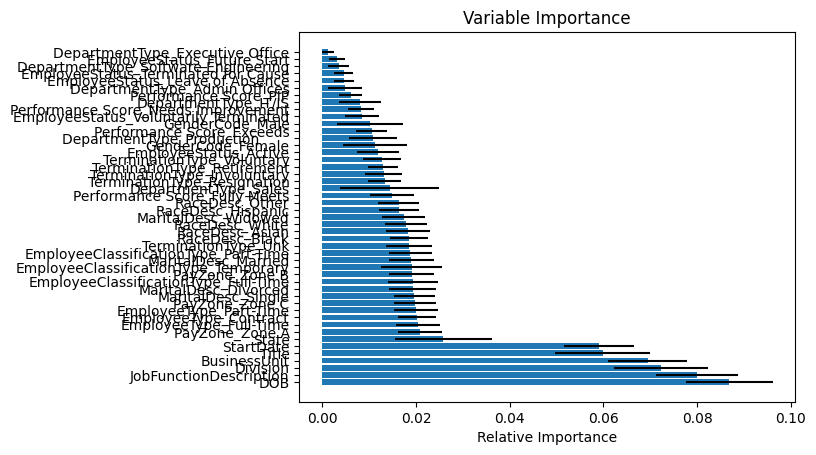

In [ ]:
sorted_idx = trace_hist_importance(X, best_data, y)

## Recherche des meilleurs paramètres

In [ ]:
best_model.fit(best_data, y)

predictions = best_model.predict(best_data)

print(predictions)

[2.96637154 2.9765068  2.85112233 3.19508277 3.00879347 3.12263605
 2.93033442 2.56094024 3.12372142 2.9822728  3.05668751 2.64767137
 3.11305721 2.97053775 3.45728525 3.01931683 3.22987982 3.20868807
 3.23248326 3.07252171 3.01096114 2.83699078 3.19049533 3.35842453
 2.90557273 2.89662758 2.8981267  3.02658774 3.23460783 3.32456222
 2.89237165 3.16686877 2.77626794 2.76805701 2.45968693 2.92342731
 2.66866008 3.64214538 2.87486311 3.05143623 2.98163076 3.21940581
 2.77021141 3.03561124 2.99546526 3.07371281 2.78705518 2.75438353
 2.30876975 2.81205038 2.91680502 2.5984546  3.15955807 2.4601453
 2.96704572 2.64146726 2.79385964 3.23341988 3.27814666 2.71475285
 3.35285107 2.96138936 2.93084031 2.77856807 3.11492571 2.77913042
 2.97386675 3.36144296 2.80167648 3.18591143 2.47935064 3.15200287
 3.20313314 2.91625038 3.19711164 2.52195825 3.12305053 2.96894558
 2.37261714 2.74720368 3.07847197 2.93891715 2.74023763 2.85220085
 2.85235078 2.5902052  3.33608888 2.93487471 2.99426368 2.98372